# Setup

## Python Environment

In [1]:
import os
import copy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
import xarray as xr
print('All packages imported.')

seed = 42 # for reproducibility
print(f'Random seed set as {seed}.')

All packages imported.
Random seed set as 42.


In [2]:
# Set threshold of rainy events
prec_threshold = 0.1
print(f'Threshold of rainy event is {prec_threshold} mm/hr')

Threshold of rainy event is 0.1 mm/hr


In [3]:
# Forced library reload
%reload_ext autoreload
%autoreload 2
# %aimport utils

## Site Selection

In [4]:
site = widgets.Select(
    options=['sgp-C1', 'twp-C1', 'twp-C2', 'twp-C3'],
    value='sgp-C1',
    rows=6,
    description='ARM Site:',
    disabled=False
)


def on_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        print(f"Switch site to {change['new']}")


site.layout.width = '175px'
site.observe(on_change)
display(site)

Select(description='ARM Site:', layout=Layout(width='175px'), options=('sgp-C1', 'twp-C1', 'twp-C2', 'twp-C3')…

Switch site to twp-C1


In [5]:
product = widgets.Select(
    options=['armbeatm'],
    value='armbeatm',
    rows=1,
    description='Product:',
    disabled=False
)

def on_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        print(f"Switch site to {change['new']}")
              
product.layout.width = '175px'
product.observe(on_change)
display(product)

Select(description='Product:', layout=Layout(width='175px'), options=('armbeatm',), rows=1, value='armbeatm')

## Data Import

In [6]:
def site2stream(site, product):
    region, index = site.split('-')
    stream = region+product+index
    #print(f'Ready for data stream: {stream}')
    return stream


def get_save_file_path(file_name, stage=2):
    CURRENT_DIR = os.getcwd()
    DATA_DIR = f'{CURRENT_DIR}/../../data/stage-{stage}_cleaned'
    FILE_PATH = f'{DATA_DIR}/{file_name}'
    return FILE_PATH


def get_DS(mf):
    return xr.open_mfdataset(mf)

In [7]:
stream = site2stream(site=site.value, product=product.value)
file_name = f'{stream}_standard_dropped.cdf'
FILE_PATH = get_save_file_path(file_name)

DS = get_DS(FILE_PATH)
DS

<xarray.Dataset>
Dimensions:        (p: 37, time: 4807)
Coordinates:
  * time           (time) datetime64[ns] 1997-08-28T04:30:00 ... 2010-08-25T23:30:00
  * p              (p) float32 1000.0 975.0 950.0 925.0 ... 150.0 125.0 100.0
Data variables:
    prec_sfc_next  (time) float32 dask.array<shape=(4807,), chunksize=(4807,)>
    prec_sfc       (time) float32 dask.array<shape=(4807,), chunksize=(4807,)>
    T_sfc          (time) float32 dask.array<shape=(4807,), chunksize=(4807,)>
    rh_sfc         (time) float32 dask.array<shape=(4807,), chunksize=(4807,)>
    u_sfc          (time) float32 dask.array<shape=(4807,), chunksize=(4807,)>
    v_sfc          (time) float32 dask.array<shape=(4807,), chunksize=(4807,)>
    p_sfc          (time) float32 dask.array<shape=(4807,), chunksize=(4807,)>
    T_p            (time, p) float32 dask.array<shape=(4807, 37), chunksize=(4807, 37)>
    rh_p           (time, p) float32 dask.array<shape=(4807, 37), chunksize=(4807, 37)>
    u_p            (tim

# Data Quality Control

## Data Visualization

### Instant Parameter Plots

In [10]:
from utils import plot_1d, plot_2d, binplot_prec

var_1d = [var for var in list(DS) if ('_sfc' in var)]
var_2d = [var for var in list(DS) if ('_p' in var)]
print(f'1-dim variables: {var_1d}')
print(f'2-dim variables: {var_2d}')

1-dim variables: ['prec_sfc_next', 'prec_sfc', 'T_sfc', 'rh_sfc', 'u_sfc', 'v_sfc', 'p_sfc']
2-dim variables: ['T_p', 'rh_p', 'u_p', 'v_p']


/scratch/s1895566/miniconda/base/envs/venv/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


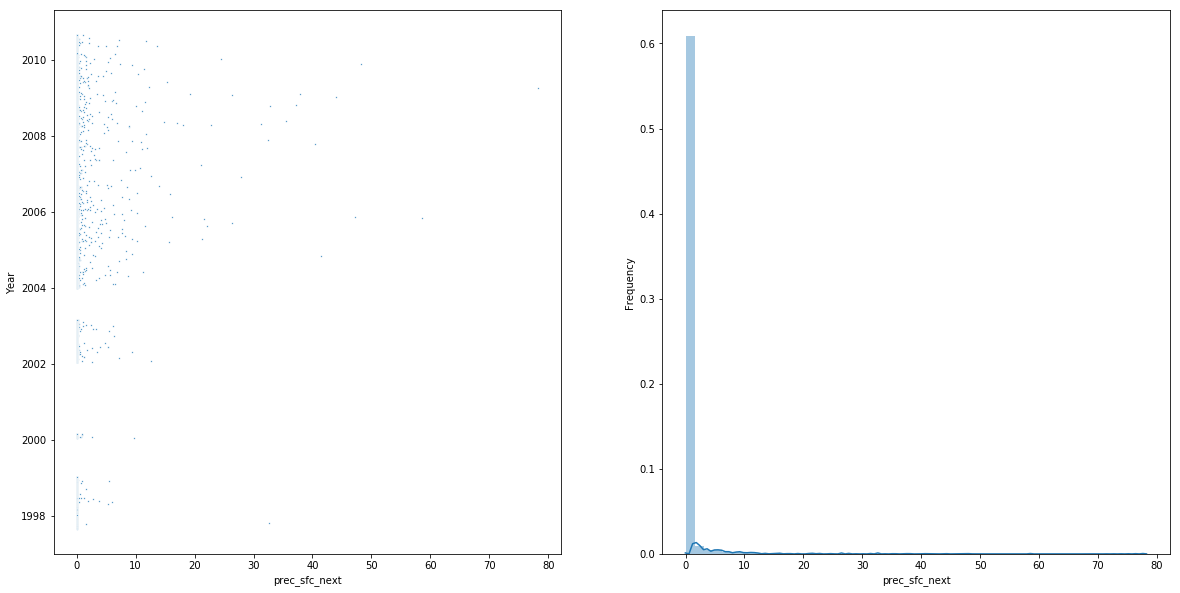

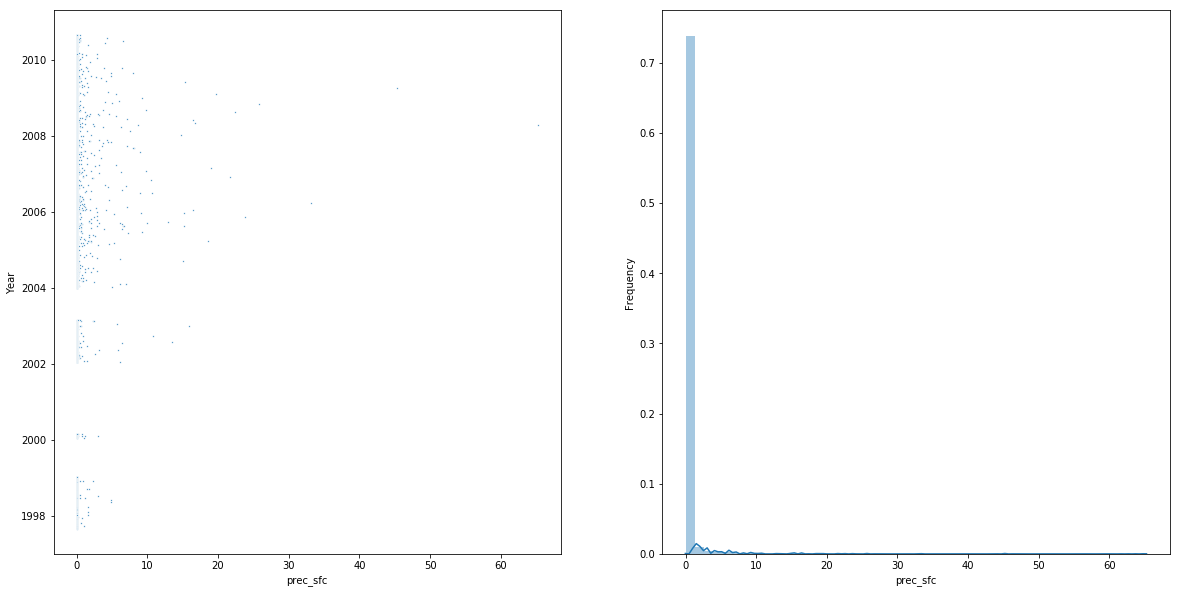

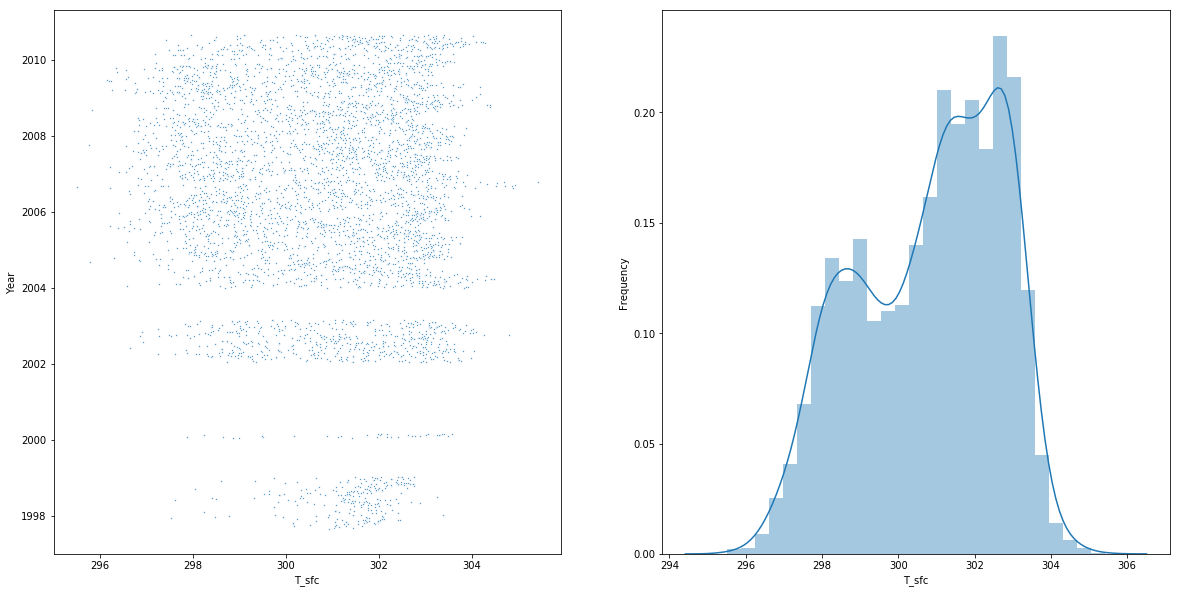

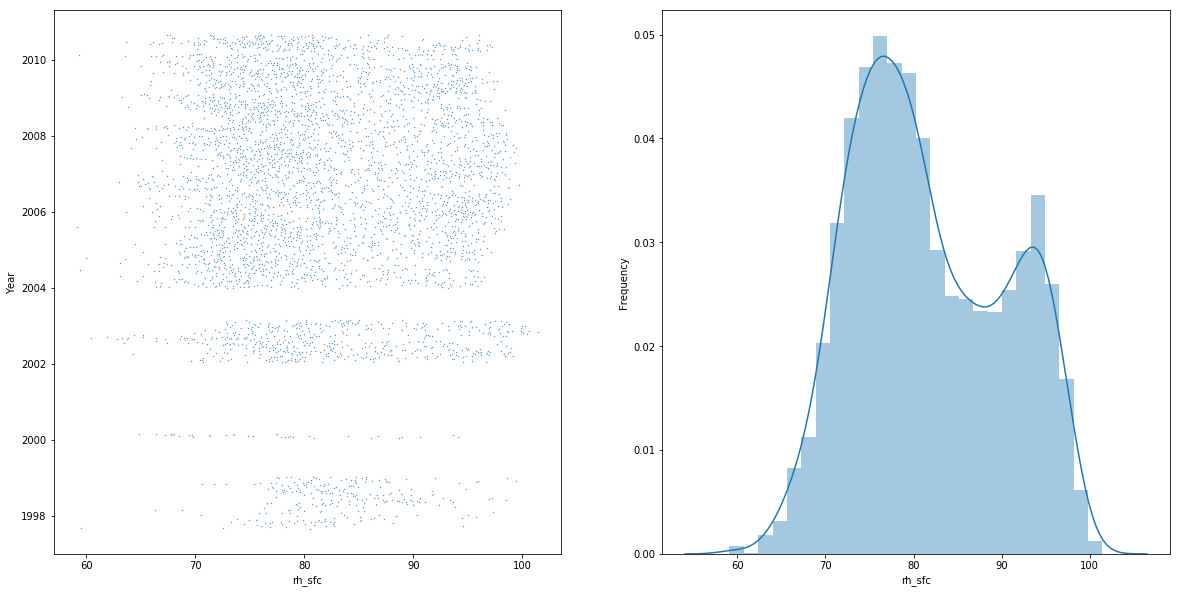

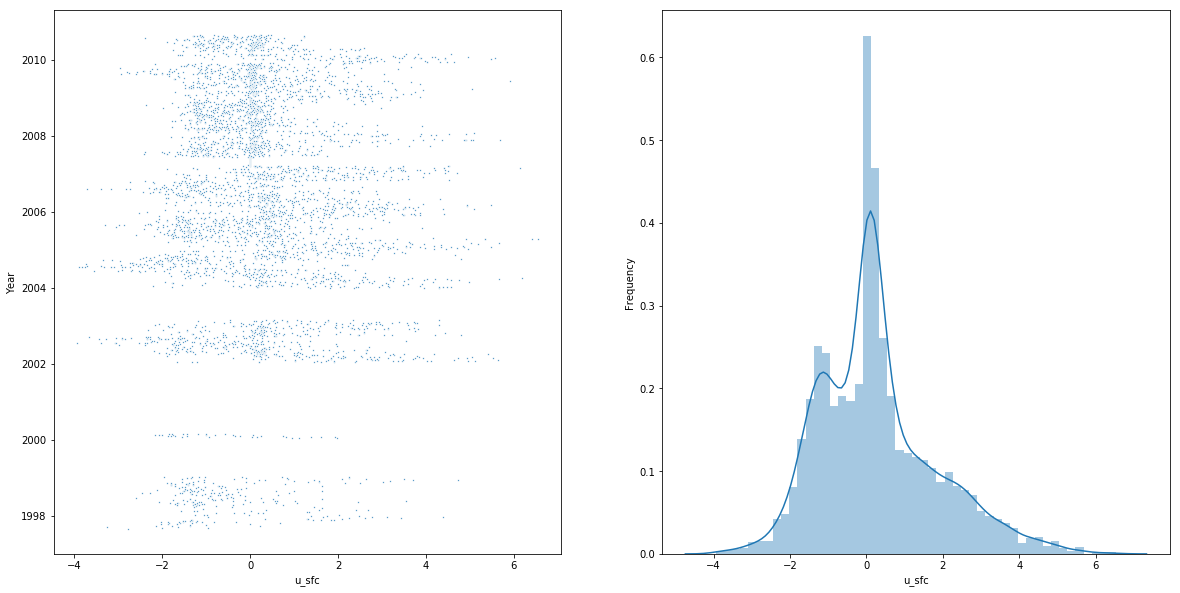

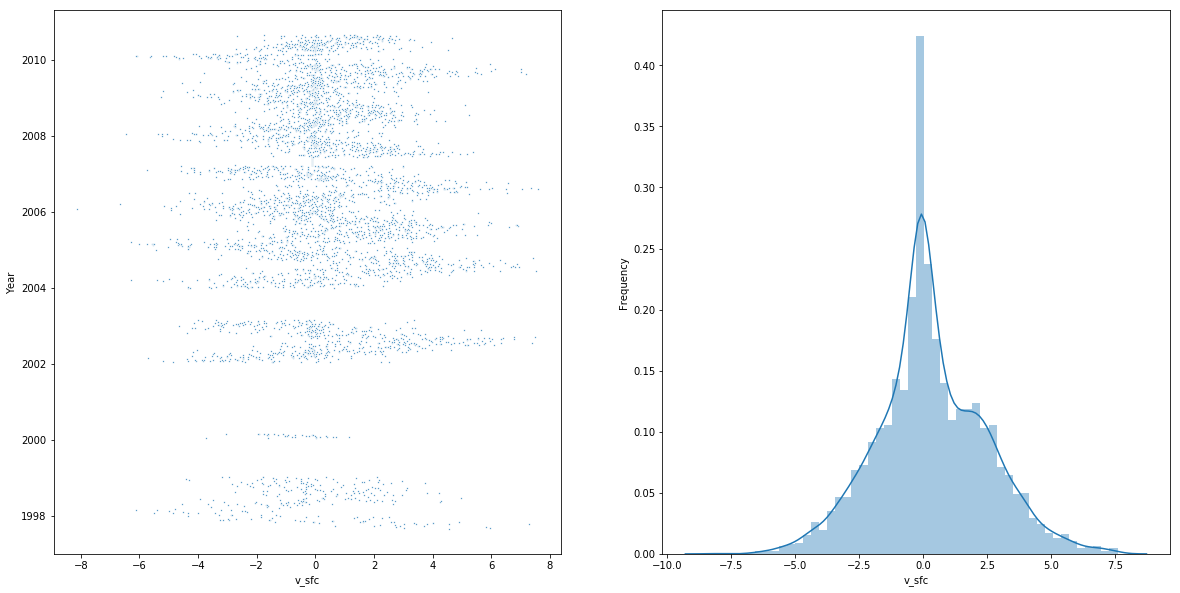

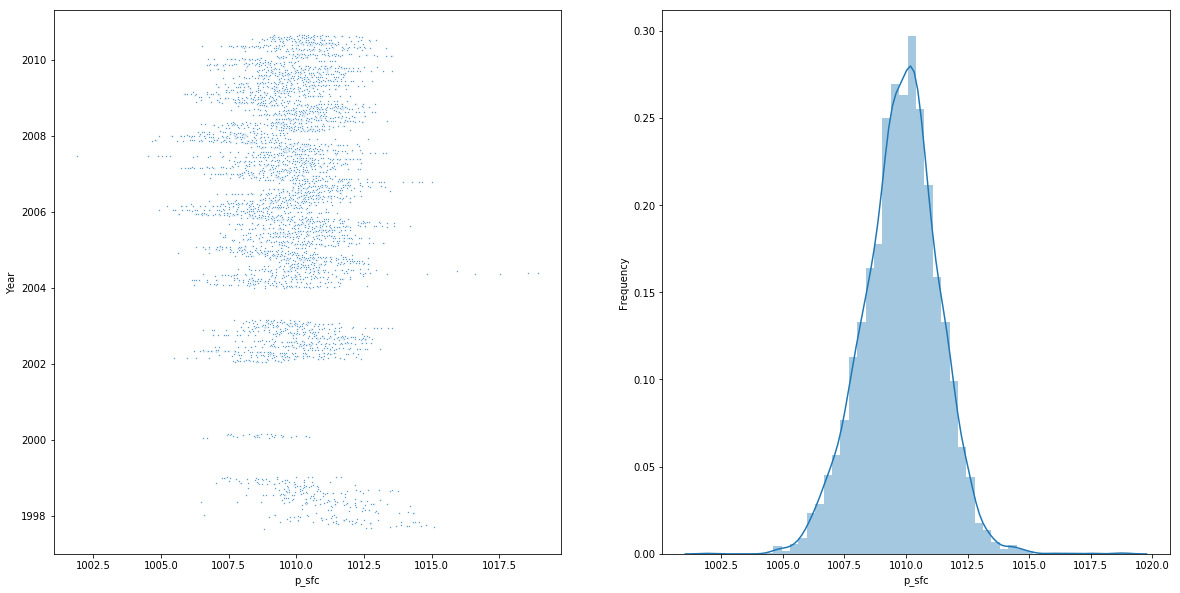

In [11]:
plot_1d(DS, var_1d)

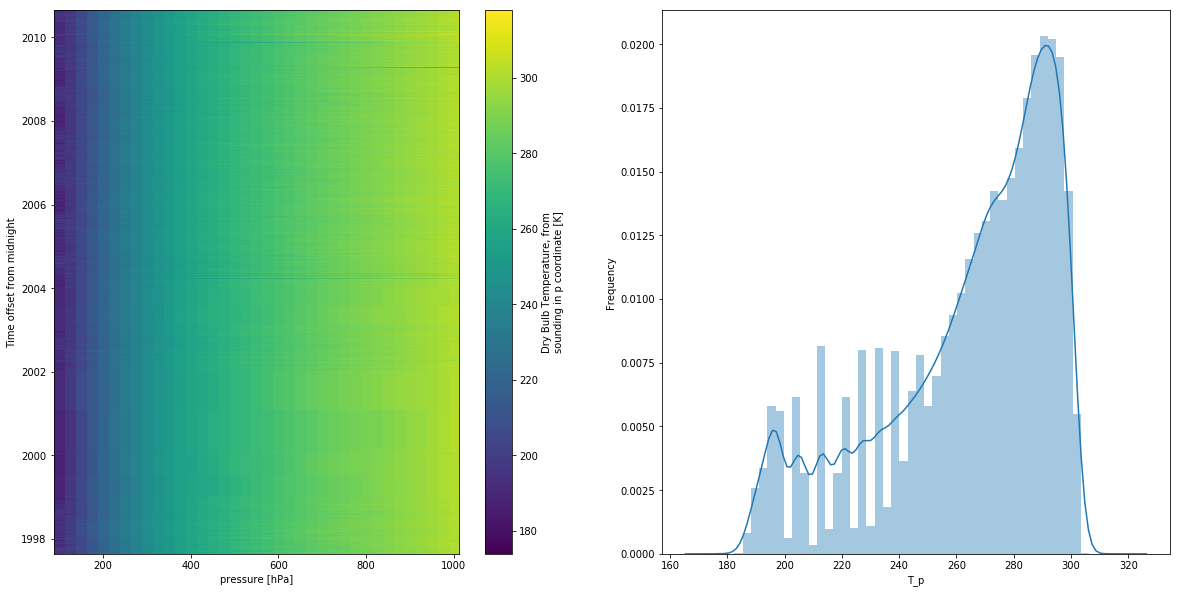

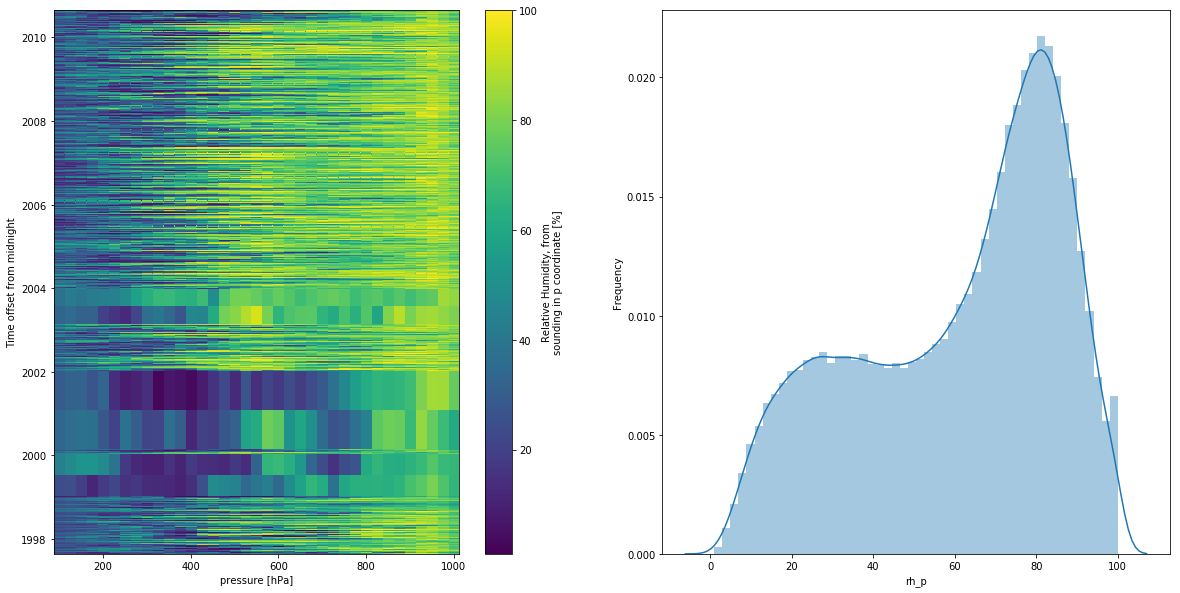

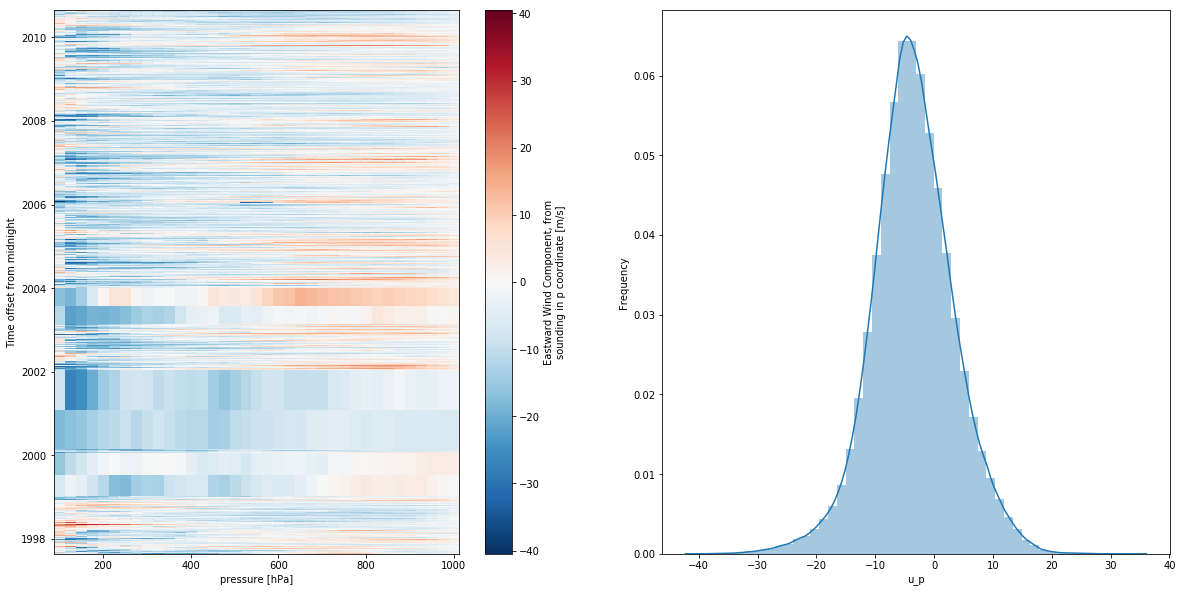

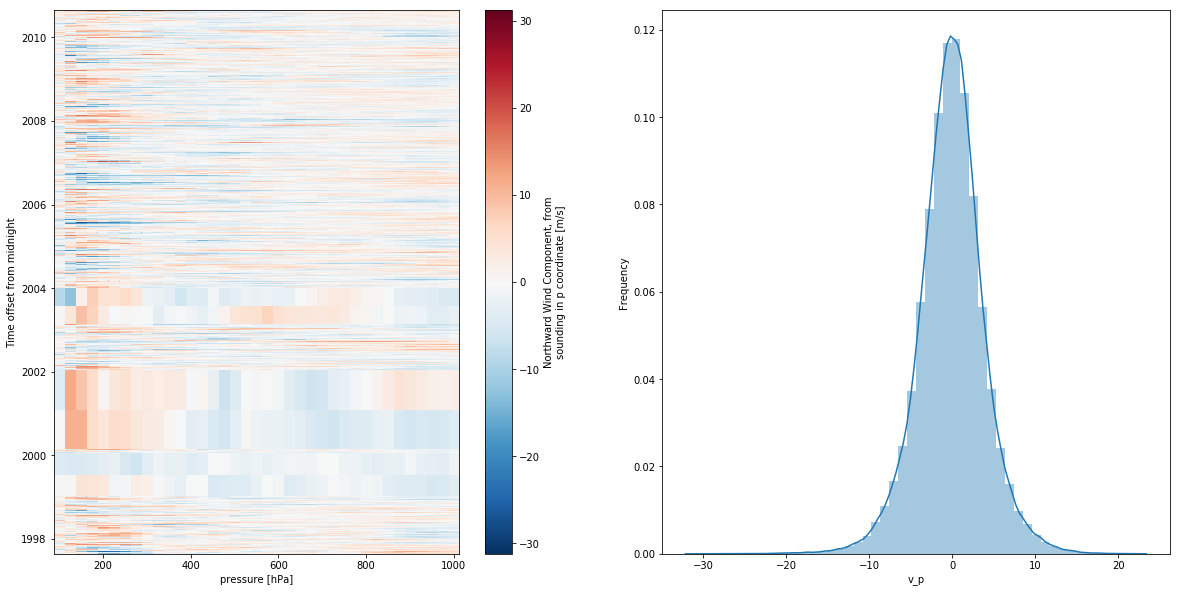

In [ ]:
plot_2d(DS, var_2d)

### Correlation Plots

In [ ]:
from utils import DS_flatten, plot_pair, plot_corr
DS_temp = DS_flatten(DS, var_1d, var_2d)
df = DS_temp.to_dataframe()

In [ ]:
# Pair plot
plot_pair(df,
          cols_str=['prec_sfc_next', 'prec_sfc', 'T_sfc', 'rh_sfc', 'T_p1000', 'rh_p1000'])

In [ ]:
# Correlation Matrix
plot_corr(df)

### Flattened One-dimensional Parameter Plots

In [ ]:
plot_1d(DS_temp, list(DS_temp))

## Data Filtering (DO NOT RUN TWICE)

In [16]:
from utils import abs_zscore_cut, abs_zscore, DS_mark_outliers, get_DS_plev

In [18]:
DS

<xarray.Dataset>
Dimensions:        (p: 37, time: 4807)
Coordinates:
  * time           (time) datetime64[ns] 1997-08-28T04:30:00 ... 2010-08-25T23:30:00
  * p              (p) float32 1000.0 975.0 950.0 925.0 ... 150.0 125.0 100.0
Data variables:
    prec_sfc_next  (time) float32 dask.array<shape=(4807,), chunksize=(4807,)>
    prec_sfc       (time) float32 dask.array<shape=(4807,), chunksize=(4807,)>
    T_sfc          (time) float32 dask.array<shape=(4807,), chunksize=(4807,)>
    rh_sfc         (time) float32 dask.array<shape=(4807,), chunksize=(4807,)>
    u_sfc          (time) float32 dask.array<shape=(4807,), chunksize=(4807,)>
    v_sfc          (time) float32 dask.array<shape=(4807,), chunksize=(4807,)>
    p_sfc          (time) float32 dask.array<shape=(4807,), chunksize=(4807,)>
    T_p            (time, p) float32 dask.array<shape=(4807, 37), chunksize=(4807, 37)>
    rh_p           (time, p) float32 dask.array<shape=(4807, 37), chunksize=(4807, 37)>
    u_p            (tim

# Data Pre-processing

## Data Loading

In [8]:
str_y = list(DS)[0]
str_Xscalar = [var for var in list(DS)[1:] if '_p' not in var]
str_Xvec = [var for var in list(DS)[1:] if '_p' in var]
#plev = DS['p'].values.astype(float)  # array of pressure level

from utils import extract_scalar, merge_channels

y, Xscalar = extract_scalar(DS, str_y, str_Xscalar)
Xvec = merge_channels(DS, str_Xvec)

print(y.shape)
print(Xscalar.shape)
print(Xvec.shape)

(4807, 1)
(4807, 6)
(4807, 37, 4)


## Train-test Split

In [9]:
# Check class imbalance
binary = y > prec_threshold
print('1 class ratio= {:.2%}'.format(binary.mean()))

1 class ratio= 16.56%


In [10]:
from classes import Sample, SampleSubset
from utils import split
all_sample = SampleSubset(binary, y, Xscalar, Xvec)

# train-test split
train_sample, temp_sample = split(all_sample, train_size=0.6)
validation_sample, test_sample = split(temp_sample, train_size=0.75)

s = Sample(train_sample, validation_sample, test_sample)
#train/valid/test is 0.6/0.3/0.1 split

/scratch/s1895566/miniconda/base/envs/venv/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
/scratch/s1895566/miniconda/base/envs/venv/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [11]:
# class ratio
split_sizes = [s.train.size, s.validation.size, s.test.size]
split_sizes = [x/sum(split_sizes) for x in split_sizes]
print(f'train/valid/test is {split_sizes[0]:.2f}/{split_sizes[1]:.2f}/{split_sizes[2]:.2f} split')

# Class distribution in train and test samples
print('1 class ratio in train set= {:.2%}'.format(s.train.class_ratio))
print('1 class ratio in validation set= {:.2%}'.format(s.validation.class_ratio))
print('1 class ratio in test set= {:.2%}'.format(s.test.class_ratio))

train/valid/test is 0.60/0.30/0.10 split
1 class ratio in train set= 16.57%
1 class ratio in validation set= 16.50%
1 class ratio in test set= 16.63%


## Data Standardization/Flattening

In [12]:
from utils import standardize_all, flattening_all
s = standardize_all(s)
s = flattening_all(s)

## Data Grouping

In [13]:
# for convenience
from utils import all_x, all_y

# for classification
all_data = (s.train.Xflatten, s.validation.Xflatten, np.squeeze(s.train.bin), np.squeeze(s.validation.bin))
#all_data = (train_Xflatten, valid_Xflatten, np.squeeze(train_bin), np.squeeze(valid_bin))

# Classical Classification

## Model Objectification

In [14]:
from classes import Classifier

## Common Classifiers

### K-nearest Neighbours

In [15]:
# WARNING - high-dim KNN is time-consuming
from utils_classifiers import KNN_grid_search
# KNN does not have class_weight implemented - make sense
knn = Classifier('KNN', KNN_grid_search(all_data))

KNN k=1: CV F1 macro= [0.5905] + [0.0084]
KNN k=2: CV F1 macro= [0.5545] + [0.0176]
KNN k=3: CV F1 macro= [0.5850] + [0.0276]
KNN k=4: CV F1 macro= [0.5350] + [0.0125]
KNN k=5: CV F1 macro= [0.5676] + [0.0192]
KNN k=6: CV F1 macro= [0.5200] + [0.0037]
KNN k=7: CV F1 macro= [0.5379] + [0.0136]
KNN k=8: CV F1 macro= [0.4986] + [0.0158]
KNN k=9: CV F1 macro= [0.5135] + [0.0179]
KNN k=10: CV F1 macro= [0.4905] + [0.0175]
              precision    recall  f1-score   support

       False       0.86      0.88      0.87      1204
        True       0.31      0.28      0.29       238

   micro avg       0.78      0.78      0.78      1442
   macro avg       0.58      0.58      0.58      1442
weighted avg       0.77      0.78      0.77      1442

[[1054  150]
 [ 172   66]]
AUROC= 0.5764
F1 macro= 0.5791

KNN k=1: F1 macro= 0.5791


### Logistic Regression

In [16]:
from utils_classifiers import LogReg_grid_search
logreg = Classifier('Logistic Regression', LogReg_grid_search(all_data))

L2 LogReg β=0.1: CV F1 macro= [0.6021] + [0.0116]
L2 LogReg β=0.2: CV F1 macro= [0.5999] + [0.0113]
L2 LogReg β=0.3: CV F1 macro= [0.5997] + [0.0091]
L2 LogReg β=0.4: CV F1 macro= [0.5987] + [0.0078]
L2 LogReg β=0.5: CV F1 macro= [0.5974] + [0.0070]
L2 LogReg β=0.6: CV F1 macro= [0.5972] + [0.0060]
L2 LogReg β=0.7: CV F1 macro= [0.5971] + [0.0074]
L2 LogReg β=0.8: CV F1 macro= [0.5978] + [0.0065]
L2 LogReg β=0.9: CV F1 macro= [0.5970] + [0.0066]
L2 LogReg β=1.0: CV F1 macro= [0.5961] + [0.0076]
L2 LogReg β=2.0: CV F1 macro= [0.5947] + [0.0075]
L2 LogReg β=3.0: CV F1 macro= [0.5957] + [0.0063]
L2 LogReg β=4.0: CV F1 macro= [0.5949] + [0.0072]
L2 LogReg β=5.0: CV F1 macro= [0.5949] + [0.0071]
L2 LogReg β=6.0: CV F1 macro= [0.5934] + [0.0054]
L2 LogReg β=7.0: CV F1 macro= [0.5931] + [0.0055]
L2 LogReg β=8.0: CV F1 macro= [0.5931] + [0.0055]
L2 LogReg β=9.0: CV F1 macro= [0.5928] + [0.0057]
L2 LogReg β=10.0: CV F1 macro= [0.5924] + [0.0062]
L1 LogReg β=0.1: CV F1 macro= [0.6112] + [0.0106]

/scratch/s1895566/miniconda/base/envs/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### Support-vector Machine

In [17]:
from utils_classifiers import SVM_grid_search
svm = Classifier('SVM', SVM_grid_search(all_data))

SVM β=0.1: CV F1 macro= [0.5977] + [0.0181]
SVM β=0.2: CV F1 macro= [0.6195] + [0.0241]
SVM β=0.3: CV F1 macro= [0.6314] + [0.0226]
SVM β=0.4: CV F1 macro= [0.6399] + [0.0182]
SVM β=0.5: CV F1 macro= [0.6406] + [0.0176]
SVM β=0.6: CV F1 macro= [0.6419] + [0.0165]
SVM β=0.7: CV F1 macro= [0.6474] + [0.0142]
SVM β=0.8: CV F1 macro= [0.6471] + [0.0141]
SVM β=0.9: CV F1 macro= [0.6443] + [0.0164]
SVM β=1.0: CV F1 macro= [0.6455] + [0.0173]
SVM β=2.0: CV F1 macro= [0.6566] + [0.0147]
SVM β=3.0: CV F1 macro= [0.6561] + [0.0195]
SVM β=4.0: CV F1 macro= [0.6584] + [0.0231]
SVM β=5.0: CV F1 macro= [0.6508] + [0.0186]
SVM β=6.0: CV F1 macro= [0.6495] + [0.0167]
SVM β=7.0: CV F1 macro= [0.6464] + [0.0111]
SVM β=8.0: CV F1 macro= [0.6438] + [0.0110]
SVM β=9.0: CV F1 macro= [0.6396] + [0.0119]
SVM β=10.0: CV F1 macro= [0.6403] + [0.0103]
              precision    recall  f1-score   support

       False       0.88      0.90      0.89      1204
        True       0.40      0.36      0.38       238


## Tree-type Classifiers

### Random Forest

In [18]:
from utils_classifiers import RandomForest_grid_search
forest = Classifier('Random Forest', RandomForest_grid_search(all_data))

              precision    recall  f1-score   support

       False       0.91      0.83      0.87      1204
        True       0.41      0.61      0.49       238

   micro avg       0.79      0.79      0.79      1442
   macro avg       0.66      0.72      0.68      1442
weighted avg       0.83      0.79      0.81      1442

[[995 209]
 [ 93 145]]
AUROC= 0.7178
F1 macro= 0.6791
RandomForest depth=2: F1 macro= [0.6791]
              precision    recall  f1-score   support

       False       0.92      0.86      0.89      1204
        True       0.47      0.63      0.54       238

   micro avg       0.82      0.82      0.82      1442
   macro avg       0.70      0.75      0.71      1442
weighted avg       0.85      0.82      0.83      1442

[[1036  168]
 [  88  150]]
AUROC= 0.7454
F1 macro= 0.7148
RandomForest depth=3: F1 macro= [0.7148]
              precision    recall  f1-score   support

       False       0.92      0.89      0.91      1204
        True       0.53      0.61      0.57

### Bagging

In [19]:
from utils_classifiers import Bagging
# Bagging does not have class_weight implemented
bag = Classifier('Bagging', Bagging(all_data))

              precision    recall  f1-score   support

       False       0.92      0.96      0.94      1204
        True       0.75      0.56      0.64       238

   micro avg       0.90      0.90      0.90      1442
   macro avg       0.84      0.76      0.79      1442
weighted avg       0.89      0.90      0.89      1442

[[1160   44]
 [ 104  134]]
AUROC= 0.7632
F1 macro= 0.7921


### Decision Tree

In [20]:
from utils_classifiers import DecisionTree
tree = Classifier('Decision Tree', DecisionTree(all_data))

              precision    recall  f1-score   support

       False       0.90      0.91      0.90      1204
        True       0.50      0.46      0.48       238

   micro avg       0.84      0.84      0.84      1442
   macro avg       0.70      0.69      0.69      1442
weighted avg       0.83      0.84      0.83      1442

[[1095  109]
 [ 128  110]]
AUROC= 0.6858
F1 macro= 0.6919


### Extra Trees

In [21]:
from utils_classifiers import ExtraTrees
extra = Classifier('Extra Trees', ExtraTrees(all_data))

              precision    recall  f1-score   support

       False       0.84      1.00      0.91      1204
        True       0.92      0.05      0.10       238

   micro avg       0.84      0.84      0.84      1442
   macro avg       0.88      0.52      0.50      1442
weighted avg       0.86      0.84      0.78      1442

[[1203    1]
 [ 226   12]]
AUROC= 0.5248
F1 macro= 0.5047


## Boosting Classifiers

### Gradient Boosting

In [22]:
from utils_classifiers import GradB
# GradB does not have class_weight implemented
gradb = Classifier('Gradient Boosting', GradB(all_data))

              precision    recall  f1-score   support

       False       0.91      0.97      0.94      1204
        True       0.76      0.50      0.61       238

   micro avg       0.89      0.89      0.89      1442
   macro avg       0.83      0.74      0.77      1442
weighted avg       0.88      0.89      0.88      1442

[[1166   38]
 [ 118  120]]
AUROC= 0.7363
F1 macro= 0.7717


### AdaBoost

In [23]:
from utils_classifiers import AdaB
# AdaB does not have class_weight implemented
adab = Classifier('AdaBoost', AdaB(all_data))

              precision    recall  f1-score   support

       False       0.90      0.96      0.92      1204
        True       0.66      0.43      0.52       238

   micro avg       0.87      0.87      0.87      1442
   macro avg       0.78      0.69      0.72      1442
weighted avg       0.86      0.87      0.86      1442

[[1151   53]
 [ 135  103]]
AUROC= 0.6944
F1 macro= 0.7237


### XGBoost

In [24]:
from utils_classifiers import XGB
# XGB does not have class_weight implemented
xgb = Classifier('XGBoost', XGB(all_data))

              precision    recall  f1-score   support

       False       0.91      0.97      0.94      1204
        True       0.80      0.52      0.63       238

   micro avg       0.90      0.90      0.90      1442
   macro avg       0.86      0.75      0.79      1442
weighted avg       0.89      0.90      0.89      1442

[[1173   31]
 [ 114  124]]
AUROC= 0.7476
F1 macro= 0.7864


## Bayesian Classifiers

### Naïve Bayes

In [25]:
from utils_classifiers import NBayes
# NBayes does not have class_weight implemented
bayes = Classifier('Naïve Bayes', NBayes(all_data))

              precision    recall  f1-score   support

       False       0.87      0.93      0.90      1204
        True       0.42      0.27      0.33       238

   micro avg       0.82      0.82      0.82      1442
   macro avg       0.65      0.60      0.61      1442
weighted avg       0.79      0.82      0.80      1442

[[1116   88]
 [ 173   65]]
AUROC= 0.6000
F1 macro= 0.6139


### Gaussian Process

In [26]:
from utils_classifiers import GP
# GP does not have class_weight implemented
gp = Classifier('Gaussian Process', GP(all_data))

              precision    recall  f1-score   support

       False       0.86      0.88      0.87      1204
        True       0.31      0.26      0.28       238

   micro avg       0.78      0.78      0.78      1442
   macro avg       0.58      0.57      0.58      1442
weighted avg       0.77      0.78      0.77      1442

[[1062  142]
 [ 175   63]]
AUROC= 0.5734
F1 macro= 0.5773


## Majority Voting

In [27]:
models = [knn, logreg, svm, forest, bag,
          tree, extra, gradb, adab, xgb, bayes, gp]
model_summary = pd.DataFrame({'Model': [x.name for x in models],
                              'F1': [x.f1_macro for x in models]}).set_index('Model').sort_values('F1',
                                                                                                  ascending=False)
model_summary

,F1
Model,
Bagging,0.792132
XGBoost,0.786417
Gradient Boosting,0.771680
Random Forest,0.769304
AdaBoost,0.723670
Decision Tree,0.691875
SVM,0.632020
Naïve Bayes,0.613894
Logistic Regression,0.613398


In [28]:
from utils_classifiers import Voting
voting = Classifier('Voting', Voting(all_data, 
                                     models=[x.classifier for x in models],
                                     model_name=[x.name for x in models], 
                                     weights=[x.f1_macro for x in models],
                                     how_to_vote='hard'))

              precision    recall  f1-score   support

       False       0.90      0.97      0.94      1204
        True       0.77      0.46      0.57       238

   micro avg       0.89      0.89      0.89      1442
   macro avg       0.83      0.72      0.75      1442
weighted avg       0.88      0.89      0.88      1442

[[1171   33]
 [ 129  109]]
AUROC= 0.7153
F1 macro= 0.7545


## Stacking

# Convolutional Neural Net

## ADASYN Oversampling

In [63]:
from classes import AugmentedSubset
aug = Sample(AugmentedSubset(s.train), s.validation, s.test)
print('1 class ratio after ADASYN= {:.2%}'.format(aug.train.class_ratio))

/scratch/s1895566/miniconda/base/envs/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1 class ratio after ADASYN= 48.72%


## Network Construction

In [64]:
from keras.models import Model
from keras.layers import Activation, BatchNormalization, Conv1D, Dense, Dropout, MaxPooling1D
from keras.layers import concatenate, Flatten, Input
from keras.optimizers import Adam
from keras.utils import plot_model
from keras import regularizers
from keras.callbacks import EarlyStopping, ModelCheckpoint

from utils_nn import f1_macro_loss

In [66]:
# Input placeholders
input_conv = Input(shape=aug.train.Xvec.shape[1:], name='column_input')
input_scalar = Input(shape=(aug.train.Xscalar.shape[1],), name='surface_input')

# Hidden layers
conv_1 = Conv1D(8, kernel_size=8)(input_conv)
bn_1 = BatchNormalization()(conv_1)
pool_1 = MaxPooling1D(pool_size=2)(bn_1)
act_1 = Activation('relu')(pool_1)

conv_2 = Conv1D(2, kernel_size=4)(act_1)
bn_2 = BatchNormalization()(conv_2)
pool_2 = MaxPooling1D(pool_size=2)(bn_2)
act_2 = Activation('relu')(pool_2)

flatten_2 = Flatten()(act_2)

layer = concatenate([flatten_2, input_scalar])
#layer = Dense(4, activation='relu')(layer)

hid_3 = Dense(4,
              activation='relu')(layer)
hid_3 = Dropout(0.1)(hid_3)

output = Dense(1,
               kernel_regularizer=regularizers.l2(0.02),
               activation='sigmoid',
               name='output')(hid_3)

# 1. Initialize
model = Model(inputs=[input_conv, input_scalar], outputs=output)
to_file_path = f'nn/model_c_{site.value}.png'
plot_model(model, show_shapes=True, to_file=to_file_path)
print(model.summary())

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
column_input (InputLayer)       (None, 37, 4)        0                                            
__________________________________________________________________________________________________
conv1d_5 (Conv1D)               (None, 30, 8)        264         column_input[0][0]               
__________________________________________________________________________________________________
batch_normalization_5 (BatchNor (None, 30, 8)        32          conv1d_5[0][0]                   
__________________________________________________________________________________________________
max_pooling1d_5 (MaxPooling1D)  (None, 15, 8)        0           batch_normalization_5[0][0]      
__________________________________________________________________________________________________
activation

## Network Training

In [54]:
# 2. Compile
model.compile(optimizer=Adam(),
              loss=f1_macro_loss)

to_file_path = f'nn/best_model_r_{site.value}.h5'
callbacks = [EarlyStopping(monitor='loss',
                           min_delta=0,
                           patience=20,
                           verbose=0, mode='auto'),
             ModelCheckpoint(filepath=to_file_path, 
                             monitor='loss', 
                             save_best_only=True)]

In [55]:
# 3. Train
model.fit([aug.train.Xvec, aug.train.Xscalar], aug.train.bin,
          epochs=2000,
          callbacks=callbacks,
          verbose=2,
          batch_size=32, 
          validation_data=([aug.validation.Xvec, aug.validation.Xscalar], aug.validation.bin)
         )

Train on 4692 samples, validate on 1442 samples
Epoch 1/2000
 - 1s - loss: 0.5087 - val_loss: 0.5515
Epoch 2/2000
 - 1s - loss: 0.4673 - val_loss: 0.5295
Epoch 3/2000
 - 1s - loss: 0.4348 - val_loss: 0.5228
Epoch 4/2000
 - 1s - loss: 0.4111 - val_loss: 0.5026
Epoch 5/2000
 - 1s - loss: 0.3901 - val_loss: 0.4995
Epoch 6/2000
 - 1s - loss: 0.3759 - val_loss: 0.4952
Epoch 7/2000
 - 1s - loss: 0.3665 - val_loss: 0.4908
Epoch 8/2000
 - 1s - loss: 0.3579 - val_loss: 0.4819
Epoch 9/2000
 - 1s - loss: 0.3474 - val_loss: 0.4885
Epoch 10/2000
 - 1s - loss: 0.3396 - val_loss: 0.4830
Epoch 11/2000
 - 1s - loss: 0.3329 - val_loss: 0.4755
Epoch 12/2000
 - 1s - loss: 0.3260 - val_loss: 0.4716
Epoch 13/2000
 - 1s - loss: 0.3205 - val_loss: 0.4821
Epoch 14/2000
 - 1s - loss: 0.3158 - val_loss: 0.4815
Epoch 15/2000
 - 1s - loss: 0.3100 - val_loss: 0.4735
Epoch 16/2000
 - 1s - loss: 0.3102 - val_loss: 0.4665
Epoch 17/2000
 - 1s - loss: 0.3054 - val_loss: 0.4689
Epoch 18/2000
 - 1s - loss: 0.3012 - val_lo

 - 1s - loss: 0.1877 - val_loss: 0.4349
Epoch 152/2000
 - 1s - loss: 0.1863 - val_loss: 0.4558
Epoch 153/2000
 - 1s - loss: 0.1829 - val_loss: 0.4410
Epoch 154/2000
 - 1s - loss: 0.1849 - val_loss: 0.4326
Epoch 155/2000
 - 1s - loss: 0.1887 - val_loss: 0.4286
Epoch 156/2000
 - 1s - loss: 0.1901 - val_loss: 0.4351
Epoch 157/2000
 - 1s - loss: 0.1836 - val_loss: 0.4283
Epoch 158/2000
 - 1s - loss: 0.1852 - val_loss: 0.4469
Epoch 159/2000
 - 1s - loss: 0.1820 - val_loss: 0.4400
Epoch 160/2000
 - 1s - loss: 0.1878 - val_loss: 0.4403
Epoch 161/2000
 - 1s - loss: 0.1907 - val_loss: 0.4373
Epoch 162/2000
 - 1s - loss: 0.1859 - val_loss: 0.4384
Epoch 163/2000
 - 1s - loss: 0.1835 - val_loss: 0.4359
Epoch 164/2000
 - 1s - loss: 0.1794 - val_loss: 0.4363
Epoch 165/2000
 - 1s - loss: 0.1817 - val_loss: 0.4402
Epoch 166/2000
 - 1s - loss: 0.1845 - val_loss: 0.4385
Epoch 167/2000
 - 1s - loss: 0.1769 - val_loss: 0.4359
Epoch 168/2000
 - 1s - loss: 0.1793 - val_loss: 0.4330
Epoch 169/2000
 - 1s - lo

## Testing

In [56]:
from utils_classifiers import reports

aug.validation.bin_hat = model.predict([aug.validation.Xvec, aug.validation.Xscalar]) >= 0.5
_ = (reports(aug.validation.bin, aug.validation.bin_hat))

              precision    recall  f1-score   support

       False       0.89      0.72      0.80      1204
        True       0.28      0.55      0.37       238

   micro avg       0.69      0.69      0.69      1442
   macro avg       0.59      0.64      0.58      1442
weighted avg       0.79      0.69      0.73      1442

[[867 337]
 [107 131]]
AUROC= 0.6353
F1 macro= 0.5836


# Classifier Selection

## Double-check using Test Subsample

In [37]:
# Find the optimal model (argmax in Python list)
f = lambda i:models[i].f1_macro
opt_model = models[max(range(len(models)), key=f)]

In [38]:
from utils_classifiers import reports
s.test.bin_hat = opt_model.classifier.predict(s.test.Xflatten)
reports(s.test.bin, s.test.bin_hat)

              precision    recall  f1-score   support

       False       0.92      0.95      0.93       401
        True       0.69      0.56      0.62        80

   micro avg       0.89      0.89      0.89       481
   macro avg       0.80      0.76      0.78       481
weighted avg       0.88      0.89      0.88       481

[[381  20]
 [ 35  45]]
AUROC= 0.7563
F1 macro= 0.7767


0.7766850968640526

## Plot

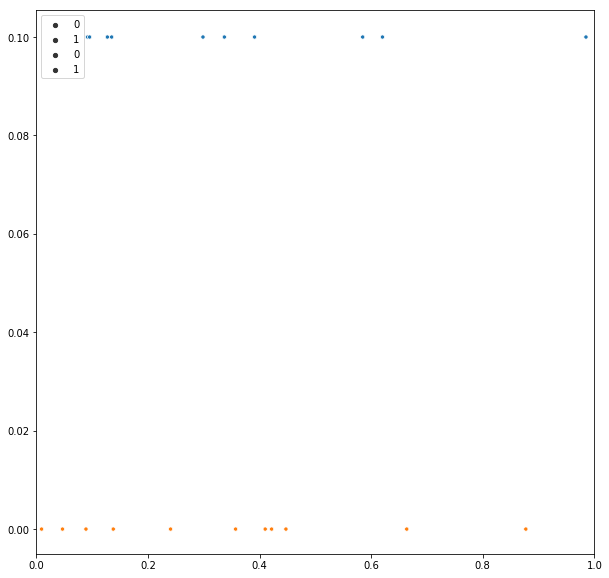

In [59]:
x1, x2 = s.test.y[s.test.bin_hat == 1][:,0], s.test.y[s.test.bin_hat == 0][:,0]

plt.figure(figsize=(10, 10))
axes = plt.gca()
axes.set_xlim([0,1])

sns.scatterplot(x1, np.zeros(x1.size)+.1, size=1)
sns.scatterplot(x2, np.zeros(x2.size), size=1)

plt.show()

# Classical Regression

## Data Extraction

In [39]:
s.validation.bin_hat = opt_model.classifier.predict(s.validation.Xflatten)
mask = s.validation.bin_hat
s_post_valid = SampleSubset(s.validation.bin[mask,:], s.validation.y[mask,:], s.validation.Xscalar[mask,:], s.validation.Xvec[mask,:,:],
                           Xflatten=s.validation.Xflatten[mask,:], Xboundary=s.validation.Xboundary)

mask = s.test.bin_hat
s_post_test = SampleSubset(s.test.bin[mask,:], s.test.y[mask,:], s.test.Xscalar[mask,:], s.test.Xvec[mask,:,:],
                          Xflatten=s.test.Xflatten[mask,:], Xboundary=s.test.Xboundary)

s_post = Sample(None, s_post_valid, s_post_test, scaler=s.scaler)

In [40]:
from classes import Regressor
sel_data = [s_post.validation.Xflatten, s_post.test.Xflatten,
            np.squeeze(s_post.validation.y), np.squeeze(s_post.test.y)]

In [41]:
[x.shape for x in sel_data]

[(178, 154), (65, 154), (178,), (65,)]

### Y Shift (+ve) for RMSLE

In [42]:
# shift all inputs for 
pos_shift = [-x.min() + 1 + np.finfo(np.float32).eps for x in sel_data[2:]] 
sel_pos_data = sel_data[:2] + [x + shift for x, shift in zip(sel_data[2:], pos_shift)]

## Common Regressors

### KNN

In [43]:
from utils_regressors import KNNReg
knn_reg = Regressor('KNN Regression', KNNReg(sel_pos_data))

0.062017962


/scratch/s1895566/miniconda/base/envs/venv/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


### Linear Regression

### Support-vector Machine

### Random Forest

In [46]:
from utils_regressors import RFR
rfr = Regressor('Random Forest', RFR(sel_pos_data))

/scratch/s1895566/miniconda/base/envs/venv/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/scratch/s1895566/miniconda/base/envs/venv/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.08869788056685349


### Bagging

In [47]:
from utils_regressors import BagReg
bag_reg = Regressor('Bagging', BagReg(sel_pos_data))

0.1076937369343607


## Performance

### Validation (fit) Error

In [51]:
models_reg = [knn_reg, rfr, bag_reg]
f = lambda i:models_reg[i].mse
opt_model_reg = models_reg[min(range(len(models_reg)), key=f)]
opt_model_reg.name

'KNN Regression'

In [52]:
s.validation.y_hat = opt_model_reg.regressor.predict(s.validation.Xflatten) - pos_shift[0]
labels = s.scaler.y.inverse_transform(s.validation.y)
outputs = s.scaler.y.inverse_transform(s.validation.y_hat)

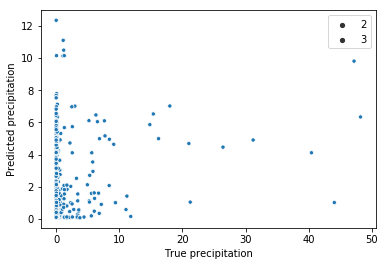

In [53]:
sns.scatterplot(np.squeeze(labels), np.squeeze(outputs), size=3)
plt.xlabel('True precipitation')
plt.ylabel('Predicted precipitation')
plt.show()

### Test Error

In [55]:
s.test.y_hat = opt_model_reg.regressor.predict(s.test.Xflatten) - pos_shift[1]
labels = s.scaler.y.inverse_transform(s.test.y)
outputs = s.scaler.y.inverse_transform(s.test.y_hat)

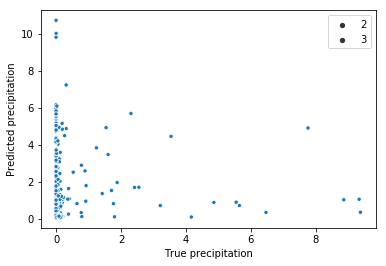

In [56]:
sns.scatterplot(np.squeeze(labels), np.squeeze(outputs), size=3)
plt.xlabel('True precipitation')
plt.ylabel('Predicted precipitation')
plt.show()

# Convolutional Neural Net

In [57]:
print('1 class ratio after ADASYN= {:.2%}'.format(s_post.validation.class_ratio))
# ideally 100%

1 class ratio after ADASYN= 75.28%


## Network Construction

In [60]:
# Input placeholders
input_conv = Input(shape=s_post.validation.Xvec.shape[1:], name='column_input')
input_scalar = Input(shape=(s_post.validation.Xscalar.shape[1],), name='surface_input')

# Hidden layers
conv_1 = Conv1D(4, kernel_size=8)(input_conv)
bn_1 = BatchNormalization()(conv_1)
pool_1 = MaxPooling1D(pool_size=2)(bn_1)
act_1 = Activation('relu')(pool_1)

conv_2 = Conv1D(1, kernel_size=4)(act_1)
bn_2 = BatchNormalization()(conv_2)
pool_2 = MaxPooling1D(pool_size=2)(bn_2)
act_2 = Activation('relu')(pool_2)

flatten_2 = Flatten()(act_2)

layer = concatenate([flatten_2, input_scalar])
#layer = Dense(4, activation='relu')(layer)

hid_3 = Dense(4,
              activation='relu')(layer)
hid_3 = Dropout(0.1)(hid_3)

output = Dense(1,
               kernel_regularizer=regularizers.l2(0.02),
               name='output')(hid_3)

# 1. Initialize
model_reg = Model(inputs=[input_conv, input_scalar], outputs=output)
to_file_path = f'nn/model_r_{site.value}.png'
plot_model(model_reg, show_shapes=True, to_file=to_file_path)
print(model_reg.summary())

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
column_input (InputLayer)       (None, 37, 4)        0                                            
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 30, 4)        132         column_input[0][0]               
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 30, 4)        16          conv1d_1[0][0]                   
__________________________________________________________________________________________________
max_pooling1d_1 (MaxPooling1D)  (None, 15, 4)        0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
activation

## Network Training

In [129]:
# 2. Compile
model_reg.compile(optimizer=Adam(),
                  loss='mean_squared_logarithmic_error')

to_file_path = f'nn/best_model_r_{site.value}.h5'
callbacks = [EarlyStopping(monitor='loss',
                           min_delta=0,
                           patience=40,
                           verbose=0, mode='auto'),
             ModelCheckpoint(filepath=to_file_path, 
                             monitor='loss', 
                             save_best_only=True)]

In [130]:
# 3. Train
model_reg.fit([s_post.validation.Xvec, s_post.validation.Xscalar], s_post.validation.y,
          epochs=2000,
          callbacks=callbacks,
          verbose=2,
          batch_size=32, 
          validation_data=([s_post.test.Xvec, s_post.test.Xscalar], s_post.test.y)
         )

Train on 178 samples, validate on 65 samples
Epoch 1/2000
 - 1s - loss: 0.6437 - val_loss: 0.3906
Epoch 2/2000
 - 0s - loss: 0.6148 - val_loss: 0.3628
Epoch 3/2000
 - 0s - loss: 0.6072 - val_loss: 0.3385
Epoch 4/2000
 - 0s - loss: 0.5669 - val_loss: 0.3150
Epoch 5/2000
 - 0s - loss: 0.5910 - val_loss: 0.2929
Epoch 6/2000
 - 0s - loss: 0.5514 - val_loss: 0.2718
Epoch 7/2000
 - 0s - loss: 0.5061 - val_loss: 0.2519
Epoch 8/2000
 - 0s - loss: 0.4677 - val_loss: 0.2323
Epoch 9/2000
 - 0s - loss: 0.4276 - val_loss: 0.2165
Epoch 10/2000
 - 0s - loss: 0.4233 - val_loss: 0.2030
Epoch 11/2000
 - 0s - loss: 0.4366 - val_loss: 0.1905
Epoch 12/2000
 - 0s - loss: 0.4660 - val_loss: 0.1794
Epoch 13/2000
 - 0s - loss: 0.4453 - val_loss: 0.1692
Epoch 14/2000
 - 0s - loss: 0.4188 - val_loss: 0.1610
Epoch 15/2000
 - 0s - loss: 0.4080 - val_loss: 0.1535
Epoch 16/2000
 - 0s - loss: 0.3806 - val_loss: 0.1470
Epoch 17/2000
 - 0s - loss: 0.3631 - val_loss: 0.1419
Epoch 18/2000
 - 0s - loss: 0.3677 - val_loss:

 - 0s - loss: 0.2318 - val_loss: 0.0831
Epoch 152/2000
 - 0s - loss: 0.2434 - val_loss: 0.0841
Epoch 153/2000
 - 0s - loss: 0.2436 - val_loss: 0.0845
Epoch 154/2000
 - 0s - loss: 0.2355 - val_loss: 0.0852
Epoch 155/2000
 - 0s - loss: 0.2474 - val_loss: 0.0863
Epoch 156/2000
 - 0s - loss: 0.2359 - val_loss: 0.0868
Epoch 157/2000
 - 0s - loss: 0.2061 - val_loss: 0.0865
Epoch 158/2000
 - 0s - loss: 0.2493 - val_loss: 0.0860
Epoch 159/2000
 - 0s - loss: 0.2168 - val_loss: 0.0851
Epoch 160/2000
 - 0s - loss: 0.2172 - val_loss: 0.0844
Epoch 161/2000
 - 0s - loss: 0.2814 - val_loss: 0.0836
Epoch 162/2000
 - 0s - loss: 0.1970 - val_loss: 0.0832
Epoch 163/2000
 - 0s - loss: 0.2240 - val_loss: 0.0835
Epoch 164/2000
 - 0s - loss: 0.2225 - val_loss: 0.0845
Epoch 165/2000
 - 0s - loss: 0.2163 - val_loss: 0.0852
Epoch 166/2000
 - 0s - loss: 0.1996 - val_loss: 0.0848
Epoch 167/2000
 - 0s - loss: 0.2447 - val_loss: 0.0847
Epoch 168/2000
 - 0s - loss: 0.2359 - val_loss: 0.0842
Epoch 169/2000
 - 0s - lo

 - 0s - loss: 0.1642 - val_loss: 0.1323
Epoch 301/2000
 - 0s - loss: 0.1740 - val_loss: 0.1268
Epoch 302/2000
 - 0s - loss: 0.1712 - val_loss: 0.1263
Epoch 303/2000
 - 0s - loss: 0.1330 - val_loss: 0.1215
Epoch 304/2000
 - 0s - loss: 0.1469 - val_loss: 0.1250
Epoch 305/2000
 - 0s - loss: 0.1250 - val_loss: 0.1262
Epoch 306/2000
 - 0s - loss: 0.1391 - val_loss: 0.1321
Epoch 307/2000
 - 0s - loss: 0.1519 - val_loss: 0.1326
Epoch 308/2000
 - 0s - loss: 0.1292 - val_loss: 0.1289
Epoch 309/2000
 - 0s - loss: 0.1184 - val_loss: 0.1272
Epoch 310/2000
 - 0s - loss: 0.1779 - val_loss: 0.1249
Epoch 311/2000
 - 0s - loss: 0.1275 - val_loss: 0.1235
Epoch 312/2000
 - 0s - loss: 0.1103 - val_loss: 0.1338
Epoch 313/2000
 - 0s - loss: 0.1368 - val_loss: 0.1349
Epoch 314/2000
 - 0s - loss: 0.1517 - val_loss: 0.1315
Epoch 315/2000
 - 0s - loss: 0.1521 - val_loss: 0.1303
Epoch 316/2000
 - 0s - loss: 0.1143 - val_loss: 0.1278
Epoch 317/2000
 - 0s - loss: 0.1187 - val_loss: 0.1295
Epoch 318/2000
 - 0s - lo

## Testing

### Validation Error

In [131]:
s_post.validation.y_hat = model_reg.predict([s_post.validation.Xvec, s_post.validation.Xscalar])
labels = s.scaler.y.inverse_transform(s_post.validation.y)
outputs = s.scaler.y.inverse_transform(s_post.validation.y_hat)

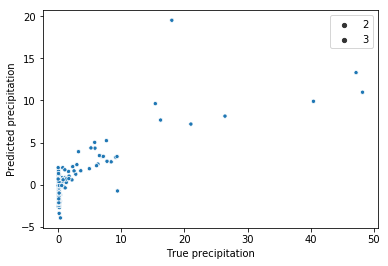

In [132]:
sns.scatterplot(np.squeeze(labels), np.squeeze(outputs), size=3)
plt.xlabel('True precipitation')
plt.ylabel('Predicted precipitation')
plt.show()

### Test Error

In [133]:
s_post.test.y_hat = model_reg.predict([s_post.test.Xvec, s_post.test.Xscalar])
labels = s.scaler.y.inverse_transform(s_post.test.y)
outputs = s.scaler.y.inverse_transform(s_post.test.y_hat)

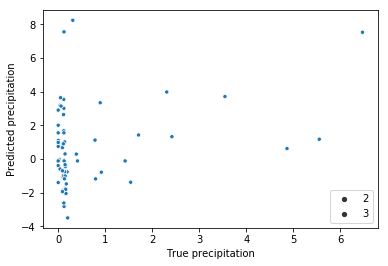

In [134]:
sns.scatterplot(np.squeeze(labels), np.squeeze(outputs), size=3)
plt.xlabel('True precipitation')
plt.ylabel('Predicted precipitation')
plt.show()